## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 5000
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.1455471440113963


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066899
0:	learn: 0.9624515	total: 65.8ms	remaining: 1m 5s
1:	learn: 0.9292655	total: 67.9ms	remaining: 33.9s
2:	learn: 0.8994176	total: 69.9ms	remaining: 23.2s
3:	learn: 0.8706881	total: 72.3ms	remaining: 18s
4:	learn: 0.8451240	total: 74.1ms	remaining: 14.7s
5:	learn: 0.8208816	total: 76ms	remaining: 12.6s
6:	learn: 0.7975325	total: 78.3ms	remaining: 11.1s
7:	learn: 0.7763827	total: 81.1ms	remaining: 10.1s
8:	learn: 0.7581082	total: 83.8ms	remaining: 9.23s
9:	learn: 0.7390542	total: 86.7ms	remaining: 8.58s
10:	learn: 0.7225889	total: 89.3ms	remaining: 8.03s
11:	learn: 0.7067645	total: 91.7ms	remaining: 7.55s
12:	learn: 0.6929189	total: 94.6ms	remaining: 7.18s
13:	learn: 0.6787053	total: 97.2ms	remaining: 6.84s
14:	learn: 0.6670713	total: 99.6ms	remaining: 6.54s
15:	learn: 0.6566827	total: 102ms	remaining: 6.29s
16:	learn: 0.6451324	total: 105ms	remaining: 6.05s
17:	learn: 0.6359092	total: 107ms	remaining: 5.86s
18:	learn: 0.6274321	total: 110ms	remaining: 5.68s


27:	learn: 0.5657522	total: 134ms	remaining: 4.64s
28:	learn: 0.5613292	total: 137ms	remaining: 4.57s
29:	learn: 0.5570548	total: 139ms	remaining: 4.49s
30:	learn: 0.5535883	total: 142ms	remaining: 4.43s
31:	learn: 0.5494291	total: 145ms	remaining: 4.37s
32:	learn: 0.5453252	total: 147ms	remaining: 4.32s
33:	learn: 0.5425480	total: 150ms	remaining: 4.26s
34:	learn: 0.5379886	total: 153ms	remaining: 4.22s
35:	learn: 0.5354147	total: 155ms	remaining: 4.16s
36:	learn: 0.5326991	total: 159ms	remaining: 4.13s
37:	learn: 0.5299072	total: 161ms	remaining: 4.09s
38:	learn: 0.5271648	total: 169ms	remaining: 4.16s
39:	learn: 0.5238975	total: 171ms	remaining: 4.11s
40:	learn: 0.5204218	total: 176ms	remaining: 4.11s
41:	learn: 0.5169605	total: 179ms	remaining: 4.09s
42:	learn: 0.5138214	total: 184ms	remaining: 4.09s
43:	learn: 0.5116115	total: 187ms	remaining: 4.07s


44:	learn: 0.5083188	total: 192ms	remaining: 4.07s
45:	learn: 0.5065041	total: 195ms	remaining: 4.04s
46:	learn: 0.5036635	total: 198ms	remaining: 4.01s
47:	learn: 0.5021655	total: 201ms	remaining: 3.99s
48:	learn: 0.5006980	total: 204ms	remaining: 3.96s
49:	learn: 0.4981639	total: 207ms	remaining: 3.93s
50:	learn: 0.4960357	total: 210ms	remaining: 3.9s
51:	learn: 0.4947370	total: 213ms	remaining: 3.88s
52:	learn: 0.4933231	total: 216ms	remaining: 3.85s
53:	learn: 0.4918311	total: 218ms	remaining: 3.83s
54:	learn: 0.4894886	total: 222ms	remaining: 3.81s
55:	learn: 0.4885442	total: 224ms	remaining: 3.78s
56:	learn: 0.4868601	total: 227ms	remaining: 3.75s
57:	learn: 0.4857487	total: 230ms	remaining: 3.73s
58:	learn: 0.4847550	total: 233ms	remaining: 3.71s
59:	learn: 0.4839785	total: 236ms	remaining: 3.7s
60:	learn: 0.4822210	total: 239ms	remaining: 3.67s
61:	learn: 0.4811477	total: 242ms	remaining: 3.66s
62:	learn: 0.4802465	total: 245ms	remaining: 3.64s
63:	learn: 0.4790608	total: 248ms

92:	learn: 0.4537515	total: 329ms	remaining: 3.2s
93:	learn: 0.4530646	total: 332ms	remaining: 3.2s
94:	learn: 0.4526592	total: 334ms	remaining: 3.19s
95:	learn: 0.4514676	total: 337ms	remaining: 3.17s
96:	learn: 0.4507701	total: 340ms	remaining: 3.16s
97:	learn: 0.4501477	total: 343ms	remaining: 3.15s
98:	learn: 0.4491305	total: 347ms	remaining: 3.15s
99:	learn: 0.4485938	total: 349ms	remaining: 3.14s
100:	learn: 0.4477843	total: 352ms	remaining: 3.13s
101:	learn: 0.4471151	total: 354ms	remaining: 3.12s
102:	learn: 0.4467933	total: 357ms	remaining: 3.11s
103:	learn: 0.4459658	total: 360ms	remaining: 3.1s
104:	learn: 0.4454928	total: 363ms	remaining: 3.09s
105:	learn: 0.4449599	total: 366ms	remaining: 3.08s
106:	learn: 0.4444837	total: 369ms	remaining: 3.08s
107:	learn: 0.4441662	total: 372ms	remaining: 3.07s
108:	learn: 0.4436506	total: 375ms	remaining: 3.06s
109:	learn: 0.4431070	total: 377ms	remaining: 3.05s
110:	learn: 0.4428216	total: 380ms	remaining: 3.04s
111:	learn: 0.4420264	t

113:	learn: 0.4410280	total: 389ms	remaining: 3.02s
114:	learn: 0.4405302	total: 392ms	remaining: 3.02s
115:	learn: 0.4400526	total: 395ms	remaining: 3.01s
116:	learn: 0.4397213	total: 397ms	remaining: 3s
117:	learn: 0.4392800	total: 400ms	remaining: 2.99s
118:	learn: 0.4389297	total: 402ms	remaining: 2.98s
119:	learn: 0.4383823	total: 405ms	remaining: 2.97s
120:	learn: 0.4378052	total: 408ms	remaining: 2.96s
121:	learn: 0.4375449	total: 412ms	remaining: 2.96s
122:	learn: 0.4371737	total: 415ms	remaining: 2.96s
123:	learn: 0.4364531	total: 418ms	remaining: 2.95s
124:	learn: 0.4361254	total: 421ms	remaining: 2.95s
125:	learn: 0.4357973	total: 424ms	remaining: 2.94s
126:	learn: 0.4353316	total: 427ms	remaining: 2.93s
127:	learn: 0.4347512	total: 430ms	remaining: 2.93s
128:	learn: 0.4342385	total: 433ms	remaining: 2.92s
129:	learn: 0.4339519	total: 435ms	remaining: 2.91s
130:	learn: 0.4335041	total: 438ms	remaining: 2.91s
131:	learn: 0.4330698	total: 441ms	remaining: 2.9s
132:	learn: 0.43

161:	learn: 0.4201322	total: 525ms	remaining: 2.71s
162:	learn: 0.4198548	total: 528ms	remaining: 2.71s
163:	learn: 0.4192600	total: 530ms	remaining: 2.7s
164:	learn: 0.4188670	total: 533ms	remaining: 2.7s
165:	learn: 0.4184775	total: 535ms	remaining: 2.69s
166:	learn: 0.4177946	total: 538ms	remaining: 2.68s
167:	learn: 0.4175167	total: 541ms	remaining: 2.68s
168:	learn: 0.4170202	total: 544ms	remaining: 2.67s
169:	learn: 0.4166466	total: 546ms	remaining: 2.67s
170:	learn: 0.4162464	total: 549ms	remaining: 2.66s
171:	learn: 0.4154735	total: 552ms	remaining: 2.66s
172:	learn: 0.4150863	total: 556ms	remaining: 2.65s
173:	learn: 0.4147770	total: 558ms	remaining: 2.65s
174:	learn: 0.4141352	total: 561ms	remaining: 2.64s
175:	learn: 0.4138151	total: 564ms	remaining: 2.64s
176:	learn: 0.4132314	total: 567ms	remaining: 2.64s
177:	learn: 0.4129689	total: 570ms	remaining: 2.63s
178:	learn: 0.4125089	total: 573ms	remaining: 2.63s
179:	learn: 0.4121642	total: 576ms	remaining: 2.62s
180:	learn: 0.

182:	learn: 0.4110783	total: 584ms	remaining: 2.61s
183:	learn: 0.4106831	total: 587ms	remaining: 2.6s
184:	learn: 0.4103270	total: 590ms	remaining: 2.6s
185:	learn: 0.4099271	total: 593ms	remaining: 2.6s
186:	learn: 0.4095689	total: 596ms	remaining: 2.59s
187:	learn: 0.4092665	total: 598ms	remaining: 2.58s
188:	learn: 0.4090821	total: 601ms	remaining: 2.58s
189:	learn: 0.4087090	total: 604ms	remaining: 2.58s
190:	learn: 0.4084075	total: 607ms	remaining: 2.57s
191:	learn: 0.4080686	total: 609ms	remaining: 2.56s
192:	learn: 0.4077579	total: 612ms	remaining: 2.56s
193:	learn: 0.4072486	total: 614ms	remaining: 2.55s
194:	learn: 0.4069875	total: 617ms	remaining: 2.55s
195:	learn: 0.4064549	total: 620ms	remaining: 2.54s
196:	learn: 0.4062762	total: 623ms	remaining: 2.54s
197:	learn: 0.4059106	total: 625ms	remaining: 2.53s
198:	learn: 0.4055386	total: 628ms	remaining: 2.53s
199:	learn: 0.4052937	total: 630ms	remaining: 2.52s
200:	learn: 0.4049479	total: 633ms	remaining: 2.52s
201:	learn: 0.4

231:	learn: 0.3956342	total: 720ms	remaining: 2.38s
232:	learn: 0.3954079	total: 723ms	remaining: 2.38s
233:	learn: 0.3950146	total: 726ms	remaining: 2.38s
234:	learn: 0.3947626	total: 728ms	remaining: 2.37s
235:	learn: 0.3945524	total: 731ms	remaining: 2.37s
236:	learn: 0.3943332	total: 734ms	remaining: 2.36s
237:	learn: 0.3940660	total: 736ms	remaining: 2.36s
238:	learn: 0.3937795	total: 739ms	remaining: 2.35s
239:	learn: 0.3934897	total: 741ms	remaining: 2.35s
240:	learn: 0.3932551	total: 744ms	remaining: 2.34s
241:	learn: 0.3930453	total: 747ms	remaining: 2.34s
242:	learn: 0.3928422	total: 750ms	remaining: 2.33s
243:	learn: 0.3925490	total: 753ms	remaining: 2.33s
244:	learn: 0.3922500	total: 756ms	remaining: 2.33s
245:	learn: 0.3919924	total: 758ms	remaining: 2.32s
246:	learn: 0.3917679	total: 761ms	remaining: 2.32s
247:	learn: 0.3915245	total: 764ms	remaining: 2.32s
248:	learn: 0.3913508	total: 767ms	remaining: 2.31s
249:	learn: 0.3910763	total: 770ms	remaining: 2.31s
250:	learn: 

253:	learn: 0.3900692	total: 781ms	remaining: 2.29s
254:	learn: 0.3898837	total: 784ms	remaining: 2.29s
255:	learn: 0.3896708	total: 786ms	remaining: 2.29s
256:	learn: 0.3895063	total: 789ms	remaining: 2.28s
257:	learn: 0.3892594	total: 792ms	remaining: 2.28s
258:	learn: 0.3887116	total: 796ms	remaining: 2.28s
259:	learn: 0.3885434	total: 798ms	remaining: 2.27s
260:	learn: 0.3882988	total: 801ms	remaining: 2.27s
261:	learn: 0.3880746	total: 804ms	remaining: 2.26s
262:	learn: 0.3877440	total: 806ms	remaining: 2.26s
263:	learn: 0.3874818	total: 809ms	remaining: 2.25s
264:	learn: 0.3873427	total: 812ms	remaining: 2.25s
265:	learn: 0.3871343	total: 815ms	remaining: 2.25s
266:	learn: 0.3868714	total: 817ms	remaining: 2.24s
267:	learn: 0.3866712	total: 820ms	remaining: 2.24s
268:	learn: 0.3864075	total: 823ms	remaining: 2.23s
269:	learn: 0.3861886	total: 825ms	remaining: 2.23s
270:	learn: 0.3860226	total: 828ms	remaining: 2.23s
271:	learn: 0.3858013	total: 831ms	remaining: 2.22s
272:	learn: 

303:	learn: 0.3791572	total: 918ms	remaining: 2.1s
304:	learn: 0.3789835	total: 921ms	remaining: 2.1s
305:	learn: 0.3787770	total: 924ms	remaining: 2.09s
306:	learn: 0.3785644	total: 926ms	remaining: 2.09s
307:	learn: 0.3783279	total: 929ms	remaining: 2.09s
308:	learn: 0.3781985	total: 931ms	remaining: 2.08s
309:	learn: 0.3779999	total: 934ms	remaining: 2.08s
310:	learn: 0.3778376	total: 937ms	remaining: 2.07s
311:	learn: 0.3776237	total: 939ms	remaining: 2.07s
312:	learn: 0.3774671	total: 941ms	remaining: 2.07s
313:	learn: 0.3772573	total: 944ms	remaining: 2.06s
314:	learn: 0.3770751	total: 947ms	remaining: 2.06s
315:	learn: 0.3768807	total: 950ms	remaining: 2.06s
316:	learn: 0.3766219	total: 952ms	remaining: 2.05s
317:	learn: 0.3764231	total: 955ms	remaining: 2.05s
318:	learn: 0.3762326	total: 958ms	remaining: 2.04s
319:	learn: 0.3760123	total: 960ms	remaining: 2.04s
320:	learn: 0.3757898	total: 962ms	remaining: 2.04s
321:	learn: 0.3756203	total: 965ms	remaining: 2.03s
322:	learn: 0.

325:	learn: 0.3749413	total: 976ms	remaining: 2.02s
326:	learn: 0.3746268	total: 979ms	remaining: 2.01s
327:	learn: 0.3744293	total: 982ms	remaining: 2.01s
328:	learn: 0.3742788	total: 985ms	remaining: 2.01s
329:	learn: 0.3741379	total: 987ms	remaining: 2s
330:	learn: 0.3739216	total: 992ms	remaining: 2s
331:	learn: 0.3735643	total: 995ms	remaining: 2s
332:	learn: 0.3733934	total: 997ms	remaining: 2s
333:	learn: 0.3732237	total: 1000ms	remaining: 1.99s
334:	learn: 0.3730390	total: 1s	remaining: 1.99s
335:	learn: 0.3727820	total: 1s	remaining: 1.99s
336:	learn: 0.3726888	total: 1.01s	remaining: 1.98s
337:	learn: 0.3725153	total: 1.01s	remaining: 1.98s
338:	learn: 0.3723701	total: 1.01s	remaining: 1.98s
339:	learn: 0.3720395	total: 1.02s	remaining: 1.97s
340:	learn: 0.3718091	total: 1.02s	remaining: 1.97s
341:	learn: 0.3715871	total: 1.02s	remaining: 1.97s
342:	learn: 0.3714345	total: 1.02s	remaining: 1.96s
343:	learn: 0.3711118	total: 1.03s	remaining: 1.96s
344:	learn: 0.3709296	total: 

375:	learn: 0.3655087	total: 1.11s	remaining: 1.85s
376:	learn: 0.3653560	total: 1.12s	remaining: 1.85s
377:	learn: 0.3652122	total: 1.12s	remaining: 1.84s
378:	learn: 0.3649997	total: 1.12s	remaining: 1.84s
379:	learn: 0.3645513	total: 1.13s	remaining: 1.84s
380:	learn: 0.3643666	total: 1.13s	remaining: 1.83s
381:	learn: 0.3641723	total: 1.13s	remaining: 1.83s
382:	learn: 0.3640247	total: 1.13s	remaining: 1.83s
383:	learn: 0.3639054	total: 1.14s	remaining: 1.82s
384:	learn: 0.3637525	total: 1.14s	remaining: 1.82s
385:	learn: 0.3635949	total: 1.14s	remaining: 1.82s
386:	learn: 0.3634554	total: 1.15s	remaining: 1.81s
387:	learn: 0.3633400	total: 1.15s	remaining: 1.81s
388:	learn: 0.3632299	total: 1.15s	remaining: 1.81s
389:	learn: 0.3630310	total: 1.15s	remaining: 1.8s
390:	learn: 0.3629568	total: 1.16s	remaining: 1.8s
391:	learn: 0.3627907	total: 1.16s	remaining: 1.8s
392:	learn: 0.3626188	total: 1.16s	remaining: 1.79s
393:	learn: 0.3624839	total: 1.17s	remaining: 1.79s
394:	learn: 0.3

396:	learn: 0.3619805	total: 1.17s	remaining: 1.78s
397:	learn: 0.3618781	total: 1.18s	remaining: 1.78s
398:	learn: 0.3617369	total: 1.18s	remaining: 1.78s
399:	learn: 0.3616047	total: 1.18s	remaining: 1.77s
400:	learn: 0.3614251	total: 1.18s	remaining: 1.77s
401:	learn: 0.3612840	total: 1.19s	remaining: 1.77s
402:	learn: 0.3610879	total: 1.19s	remaining: 1.76s
403:	learn: 0.3609216	total: 1.19s	remaining: 1.76s
404:	learn: 0.3606772	total: 1.2s	remaining: 1.75s
405:	learn: 0.3605116	total: 1.2s	remaining: 1.75s
406:	learn: 0.3603261	total: 1.2s	remaining: 1.75s
407:	learn: 0.3601780	total: 1.2s	remaining: 1.75s
408:	learn: 0.3600601	total: 1.21s	remaining: 1.74s
409:	learn: 0.3599122	total: 1.21s	remaining: 1.74s
410:	learn: 0.3597151	total: 1.21s	remaining: 1.74s
411:	learn: 0.3595394	total: 1.21s	remaining: 1.73s
412:	learn: 0.3594047	total: 1.22s	remaining: 1.73s
413:	learn: 0.3592639	total: 1.22s	remaining: 1.73s
414:	learn: 0.3591144	total: 1.22s	remaining: 1.72s
415:	learn: 0.35

445:	learn: 0.3546710	total: 1.31s	remaining: 1.63s
446:	learn: 0.3545135	total: 1.31s	remaining: 1.63s
447:	learn: 0.3543452	total: 1.32s	remaining: 1.62s
448:	learn: 0.3541895	total: 1.32s	remaining: 1.62s
449:	learn: 0.3540954	total: 1.32s	remaining: 1.62s
450:	learn: 0.3539593	total: 1.32s	remaining: 1.61s
451:	learn: 0.3538167	total: 1.33s	remaining: 1.61s
452:	learn: 0.3536960	total: 1.33s	remaining: 1.61s
453:	learn: 0.3535962	total: 1.33s	remaining: 1.6s
454:	learn: 0.3535215	total: 1.34s	remaining: 1.6s
455:	learn: 0.3533818	total: 1.34s	remaining: 1.6s
456:	learn: 0.3532387	total: 1.34s	remaining: 1.59s
457:	learn: 0.3529836	total: 1.34s	remaining: 1.59s
458:	learn: 0.3526676	total: 1.35s	remaining: 1.59s
459:	learn: 0.3525185	total: 1.35s	remaining: 1.58s
460:	learn: 0.3524438	total: 1.35s	remaining: 1.58s
461:	learn: 0.3523426	total: 1.36s	remaining: 1.58s
462:	learn: 0.3521178	total: 1.36s	remaining: 1.58s
463:	learn: 0.3519785	total: 1.36s	remaining: 1.57s
464:	learn: 0.3

465:	learn: 0.3516888	total: 1.37s	remaining: 1.57s
466:	learn: 0.3515887	total: 1.37s	remaining: 1.56s
467:	learn: 0.3515254	total: 1.37s	remaining: 1.56s
468:	learn: 0.3513910	total: 1.38s	remaining: 1.56s
469:	learn: 0.3513010	total: 1.38s	remaining: 1.56s
470:	learn: 0.3511973	total: 1.38s	remaining: 1.55s
471:	learn: 0.3510743	total: 1.39s	remaining: 1.55s
472:	learn: 0.3509176	total: 1.39s	remaining: 1.55s
473:	learn: 0.3508227	total: 1.39s	remaining: 1.54s
474:	learn: 0.3506831	total: 1.39s	remaining: 1.54s
475:	learn: 0.3503596	total: 1.4s	remaining: 1.54s
476:	learn: 0.3501284	total: 1.4s	remaining: 1.53s
477:	learn: 0.3500054	total: 1.4s	remaining: 1.53s
478:	learn: 0.3498953	total: 1.41s	remaining: 1.53s
479:	learn: 0.3497690	total: 1.41s	remaining: 1.52s
480:	learn: 0.3496184	total: 1.41s	remaining: 1.52s
481:	learn: 0.3495101	total: 1.41s	remaining: 1.52s
482:	learn: 0.3493711	total: 1.42s	remaining: 1.51s
483:	learn: 0.3492886	total: 1.42s	remaining: 1.51s
484:	learn: 0.3

513:	learn: 0.3455247	total: 1.5s	remaining: 1.42s
514:	learn: 0.3453370	total: 1.51s	remaining: 1.42s
515:	learn: 0.3452462	total: 1.51s	remaining: 1.42s
516:	learn: 0.3451333	total: 1.51s	remaining: 1.41s
517:	learn: 0.3449942	total: 1.52s	remaining: 1.41s
518:	learn: 0.3449227	total: 1.52s	remaining: 1.41s
519:	learn: 0.3447616	total: 1.52s	remaining: 1.41s
520:	learn: 0.3446579	total: 1.52s	remaining: 1.4s
521:	learn: 0.3445298	total: 1.53s	remaining: 1.4s
522:	learn: 0.3444584	total: 1.53s	remaining: 1.4s
523:	learn: 0.3443351	total: 1.53s	remaining: 1.39s
524:	learn: 0.3442160	total: 1.53s	remaining: 1.39s
525:	learn: 0.3441026	total: 1.54s	remaining: 1.39s
526:	learn: 0.3439684	total: 1.54s	remaining: 1.38s
527:	learn: 0.3438259	total: 1.54s	remaining: 1.38s


528:	learn: 0.3436391	total: 1.55s	remaining: 1.38s
529:	learn: 0.3434637	total: 1.55s	remaining: 1.37s
530:	learn: 0.3433627	total: 1.55s	remaining: 1.37s
531:	learn: 0.3432550	total: 1.55s	remaining: 1.37s
532:	learn: 0.3431378	total: 1.56s	remaining: 1.36s
533:	learn: 0.3429992	total: 1.56s	remaining: 1.36s
534:	learn: 0.3429061	total: 1.56s	remaining: 1.36s
535:	learn: 0.3427682	total: 1.57s	remaining: 1.36s
536:	learn: 0.3427224	total: 1.57s	remaining: 1.35s
537:	learn: 0.3426064	total: 1.57s	remaining: 1.35s
538:	learn: 0.3423169	total: 1.57s	remaining: 1.35s
539:	learn: 0.3421619	total: 1.58s	remaining: 1.35s
540:	learn: 0.3420403	total: 1.58s	remaining: 1.34s
541:	learn: 0.3418741	total: 1.59s	remaining: 1.34s
542:	learn: 0.3417874	total: 1.59s	remaining: 1.34s
543:	learn: 0.3417094	total: 1.59s	remaining: 1.34s
544:	learn: 0.3415554	total: 1.6s	remaining: 1.33s
545:	learn: 0.3414442	total: 1.6s	remaining: 1.33s
546:	learn: 0.3413115	total: 1.6s	remaining: 1.33s
547:	learn: 0.3

573:	learn: 0.3381893	total: 1.68s	remaining: 1.25s
574:	learn: 0.3379874	total: 1.69s	remaining: 1.25s
575:	learn: 0.3378539	total: 1.69s	remaining: 1.24s
576:	learn: 0.3377428	total: 1.69s	remaining: 1.24s
577:	learn: 0.3376616	total: 1.69s	remaining: 1.24s
578:	learn: 0.3375452	total: 1.7s	remaining: 1.23s
579:	learn: 0.3373749	total: 1.7s	remaining: 1.23s
580:	learn: 0.3373129	total: 1.7s	remaining: 1.23s
581:	learn: 0.3372361	total: 1.7s	remaining: 1.22s
582:	learn: 0.3370893	total: 1.71s	remaining: 1.22s
583:	learn: 0.3370194	total: 1.71s	remaining: 1.22s
584:	learn: 0.3368237	total: 1.71s	remaining: 1.21s
585:	learn: 0.3367585	total: 1.72s	remaining: 1.21s
586:	learn: 0.3366657	total: 1.72s	remaining: 1.21s
587:	learn: 0.3365997	total: 1.72s	remaining: 1.21s
588:	learn: 0.3364733	total: 1.73s	remaining: 1.2s
589:	learn: 0.3363459	total: 1.73s	remaining: 1.2s
590:	learn: 0.3362686	total: 1.73s	remaining: 1.2s
591:	learn: 0.3362129	total: 1.73s	remaining: 1.2s
592:	learn: 0.336115

593:	learn: 0.3360333	total: 1.74s	remaining: 1.19s
594:	learn: 0.3359066	total: 1.74s	remaining: 1.19s
595:	learn: 0.3358268	total: 1.75s	remaining: 1.18s
596:	learn: 0.3356656	total: 1.75s	remaining: 1.18s
597:	learn: 0.3355795	total: 1.75s	remaining: 1.18s
598:	learn: 0.3354564	total: 1.75s	remaining: 1.18s
599:	learn: 0.3353841	total: 1.76s	remaining: 1.17s
600:	learn: 0.3352143	total: 1.76s	remaining: 1.17s
601:	learn: 0.3351334	total: 1.76s	remaining: 1.17s
602:	learn: 0.3350003	total: 1.77s	remaining: 1.16s
603:	learn: 0.3348794	total: 1.77s	remaining: 1.16s
604:	learn: 0.3347722	total: 1.77s	remaining: 1.16s
605:	learn: 0.3346758	total: 1.78s	remaining: 1.16s
606:	learn: 0.3345206	total: 1.78s	remaining: 1.15s
607:	learn: 0.3343910	total: 1.78s	remaining: 1.15s
608:	learn: 0.3342921	total: 1.79s	remaining: 1.15s
609:	learn: 0.3342222	total: 1.79s	remaining: 1.15s
610:	learn: 0.3341565	total: 1.8s	remaining: 1.14s
611:	learn: 0.3340679	total: 1.8s	remaining: 1.14s
612:	learn: 0.

637:	learn: 0.3313715	total: 1.88s	remaining: 1.06s
638:	learn: 0.3312628	total: 1.88s	remaining: 1.06s
639:	learn: 0.3312158	total: 1.88s	remaining: 1.06s
640:	learn: 0.3310205	total: 1.89s	remaining: 1.06s
641:	learn: 0.3309306	total: 1.89s	remaining: 1.05s
642:	learn: 0.3308465	total: 1.89s	remaining: 1.05s
643:	learn: 0.3307202	total: 1.9s	remaining: 1.05s
644:	learn: 0.3305902	total: 1.9s	remaining: 1.04s
645:	learn: 0.3304458	total: 1.9s	remaining: 1.04s
646:	learn: 0.3302982	total: 1.91s	remaining: 1.04s
647:	learn: 0.3302097	total: 1.91s	remaining: 1.04s
648:	learn: 0.3301657	total: 1.91s	remaining: 1.03s
649:	learn: 0.3300642	total: 1.92s	remaining: 1.03s
650:	learn: 0.3299543	total: 1.92s	remaining: 1.03s


651:	learn: 0.3298628	total: 1.92s	remaining: 1.03s
652:	learn: 0.3297512	total: 1.93s	remaining: 1.02s
653:	learn: 0.3296612	total: 1.93s	remaining: 1.02s
654:	learn: 0.3295268	total: 1.93s	remaining: 1.02s
655:	learn: 0.3294593	total: 1.93s	remaining: 1.01s
656:	learn: 0.3293846	total: 1.94s	remaining: 1.01s
657:	learn: 0.3292778	total: 1.94s	remaining: 1.01s
658:	learn: 0.3291933	total: 1.94s	remaining: 1s
659:	learn: 0.3290517	total: 1.95s	remaining: 1s
660:	learn: 0.3289500	total: 1.95s	remaining: 1000ms
661:	learn: 0.3288354	total: 1.95s	remaining: 997ms
662:	learn: 0.3287269	total: 1.96s	remaining: 994ms
663:	learn: 0.3285897	total: 1.96s	remaining: 991ms
664:	learn: 0.3284669	total: 1.96s	remaining: 988ms
665:	learn: 0.3284194	total: 1.96s	remaining: 985ms
666:	learn: 0.3283430	total: 1.97s	remaining: 982ms
667:	learn: 0.3282530	total: 1.97s	remaining: 979ms
668:	learn: 0.3281175	total: 1.97s	remaining: 976ms
669:	learn: 0.3280361	total: 1.98s	remaining: 973ms
670:	learn: 0.327

701:	learn: 0.3246975	total: 2.06s	remaining: 874ms
702:	learn: 0.3245926	total: 2.06s	remaining: 871ms
703:	learn: 0.3244938	total: 2.06s	remaining: 868ms
704:	learn: 0.3244247	total: 2.06s	remaining: 864ms
705:	learn: 0.3242624	total: 2.07s	remaining: 862ms
706:	learn: 0.3241599	total: 2.07s	remaining: 859ms
707:	learn: 0.3240401	total: 2.07s	remaining: 855ms
708:	learn: 0.3239606	total: 2.08s	remaining: 852ms
709:	learn: 0.3238752	total: 2.08s	remaining: 849ms
710:	learn: 0.3237673	total: 2.08s	remaining: 846ms
711:	learn: 0.3236521	total: 2.08s	remaining: 843ms
712:	learn: 0.3235726	total: 2.09s	remaining: 840ms
713:	learn: 0.3235134	total: 2.09s	remaining: 837ms
714:	learn: 0.3234589	total: 2.09s	remaining: 834ms
715:	learn: 0.3233728	total: 2.1s	remaining: 831ms
716:	learn: 0.3233233	total: 2.1s	remaining: 828ms
717:	learn: 0.3231660	total: 2.1s	remaining: 825ms
718:	learn: 0.3230513	total: 2.1s	remaining: 823ms
719:	learn: 0.3229541	total: 2.11s	remaining: 820ms
720:	learn: 0.32

722:	learn: 0.3226642	total: 2.12s	remaining: 811ms
723:	learn: 0.3225781	total: 2.12s	remaining: 808ms
724:	learn: 0.3224940	total: 2.12s	remaining: 804ms
725:	learn: 0.3224034	total: 2.12s	remaining: 801ms
726:	learn: 0.3223241	total: 2.13s	remaining: 798ms
727:	learn: 0.3222340	total: 2.13s	remaining: 795ms
728:	learn: 0.3221769	total: 2.13s	remaining: 792ms
729:	learn: 0.3220899	total: 2.13s	remaining: 789ms
730:	learn: 0.3220164	total: 2.13s	remaining: 786ms
731:	learn: 0.3219331	total: 2.14s	remaining: 783ms
732:	learn: 0.3218567	total: 2.14s	remaining: 780ms
733:	learn: 0.3217801	total: 2.14s	remaining: 777ms
734:	learn: 0.3216644	total: 2.15s	remaining: 774ms
735:	learn: 0.3215741	total: 2.15s	remaining: 771ms
736:	learn: 0.3215187	total: 2.15s	remaining: 768ms
737:	learn: 0.3213870	total: 2.15s	remaining: 765ms
738:	learn: 0.3213012	total: 2.16s	remaining: 762ms
739:	learn: 0.3212345	total: 2.16s	remaining: 759ms
740:	learn: 0.3211389	total: 2.16s	remaining: 756ms
741:	learn: 

768:	learn: 0.3188424	total: 2.24s	remaining: 672ms
769:	learn: 0.3187407	total: 2.24s	remaining: 669ms
770:	learn: 0.3186681	total: 2.24s	remaining: 666ms
771:	learn: 0.3186047	total: 2.25s	remaining: 663ms
772:	learn: 0.3185227	total: 2.25s	remaining: 660ms
773:	learn: 0.3184709	total: 2.25s	remaining: 657ms
774:	learn: 0.3184254	total: 2.25s	remaining: 654ms
775:	learn: 0.3183323	total: 2.26s	remaining: 651ms
776:	learn: 0.3182311	total: 2.26s	remaining: 649ms
777:	learn: 0.3181704	total: 2.26s	remaining: 646ms
778:	learn: 0.3180821	total: 2.27s	remaining: 643ms
779:	learn: 0.3180082	total: 2.27s	remaining: 640ms
780:	learn: 0.3179432	total: 2.27s	remaining: 637ms
781:	learn: 0.3178900	total: 2.27s	remaining: 634ms
782:	learn: 0.3178237	total: 2.27s	remaining: 631ms
783:	learn: 0.3177335	total: 2.28s	remaining: 628ms
784:	learn: 0.3176671	total: 2.28s	remaining: 625ms
785:	learn: 0.3175621	total: 2.28s	remaining: 622ms
786:	learn: 0.3174477	total: 2.29s	remaining: 619ms
787:	learn: 

789:	learn: 0.3172418	total: 2.3s	remaining: 611ms
790:	learn: 0.3171910	total: 2.3s	remaining: 608ms
791:	learn: 0.3170950	total: 2.3s	remaining: 605ms
792:	learn: 0.3169867	total: 2.31s	remaining: 602ms
793:	learn: 0.3168879	total: 2.31s	remaining: 599ms
794:	learn: 0.3167983	total: 2.31s	remaining: 596ms
795:	learn: 0.3167141	total: 2.31s	remaining: 593ms
796:	learn: 0.3165936	total: 2.32s	remaining: 590ms
797:	learn: 0.3165049	total: 2.32s	remaining: 587ms
798:	learn: 0.3164006	total: 2.32s	remaining: 584ms
799:	learn: 0.3163263	total: 2.33s	remaining: 581ms
800:	learn: 0.3162326	total: 2.33s	remaining: 578ms
801:	learn: 0.3161875	total: 2.33s	remaining: 575ms
802:	learn: 0.3161137	total: 2.33s	remaining: 572ms
803:	learn: 0.3160279	total: 2.33s	remaining: 569ms
804:	learn: 0.3159444	total: 2.34s	remaining: 566ms
805:	learn: 0.3158473	total: 2.34s	remaining: 563ms
806:	learn: 0.3157909	total: 2.34s	remaining: 560ms
807:	learn: 0.3157064	total: 2.35s	remaining: 558ms
808:	learn: 0.3

838:	learn: 0.3134637	total: 2.43s	remaining: 467ms
839:	learn: 0.3133719	total: 2.44s	remaining: 464ms
840:	learn: 0.3133099	total: 2.44s	remaining: 462ms
841:	learn: 0.3132219	total: 2.44s	remaining: 459ms
842:	learn: 0.3131538	total: 2.45s	remaining: 456ms
843:	learn: 0.3130532	total: 2.45s	remaining: 453ms
844:	learn: 0.3129963	total: 2.45s	remaining: 450ms
845:	learn: 0.3129382	total: 2.45s	remaining: 447ms
846:	learn: 0.3128530	total: 2.46s	remaining: 444ms
847:	learn: 0.3128084	total: 2.46s	remaining: 441ms
848:	learn: 0.3127704	total: 2.46s	remaining: 438ms
849:	learn: 0.3127022	total: 2.46s	remaining: 435ms
850:	learn: 0.3126295	total: 2.47s	remaining: 432ms
851:	learn: 0.3124723	total: 2.47s	remaining: 429ms
852:	learn: 0.3124104	total: 2.47s	remaining: 426ms
853:	learn: 0.3123454	total: 2.48s	remaining: 423ms
854:	learn: 0.3122744	total: 2.48s	remaining: 420ms
855:	learn: 0.3122093	total: 2.48s	remaining: 417ms
856:	learn: 0.3121405	total: 2.48s	remaining: 414ms
857:	learn: 

859:	learn: 0.3118320	total: 2.49s	remaining: 406ms
860:	learn: 0.3117516	total: 2.49s	remaining: 403ms
861:	learn: 0.3116805	total: 2.5s	remaining: 400ms
862:	learn: 0.3115916	total: 2.5s	remaining: 397ms
863:	learn: 0.3114916	total: 2.5s	remaining: 394ms
864:	learn: 0.3114191	total: 2.5s	remaining: 391ms
865:	learn: 0.3113710	total: 2.51s	remaining: 388ms
866:	learn: 0.3112856	total: 2.51s	remaining: 385ms
867:	learn: 0.3112218	total: 2.51s	remaining: 382ms
868:	learn: 0.3111730	total: 2.52s	remaining: 379ms
869:	learn: 0.3110624	total: 2.52s	remaining: 376ms
870:	learn: 0.3109941	total: 2.52s	remaining: 373ms
871:	learn: 0.3109076	total: 2.52s	remaining: 371ms
872:	learn: 0.3108418	total: 2.53s	remaining: 368ms
873:	learn: 0.3107256	total: 2.53s	remaining: 365ms
874:	learn: 0.3106708	total: 2.53s	remaining: 362ms
875:	learn: 0.3105981	total: 2.54s	remaining: 359ms
876:	learn: 0.3105243	total: 2.54s	remaining: 356ms
877:	learn: 0.3104439	total: 2.54s	remaining: 353ms
878:	learn: 0.31

899:	learn: 0.3087405	total: 2.6s	remaining: 289ms
900:	learn: 0.3086190	total: 2.6s	remaining: 286ms
901:	learn: 0.3085571	total: 2.61s	remaining: 283ms
902:	learn: 0.3084463	total: 2.61s	remaining: 280ms
903:	learn: 0.3083894	total: 2.61s	remaining: 277ms
904:	learn: 0.3082936	total: 2.61s	remaining: 274ms
905:	learn: 0.3082368	total: 2.62s	remaining: 272ms
906:	learn: 0.3081858	total: 2.62s	remaining: 269ms
907:	learn: 0.3080550	total: 2.62s	remaining: 266ms
908:	learn: 0.3080048	total: 2.62s	remaining: 263ms
909:	learn: 0.3079482	total: 2.63s	remaining: 260ms
910:	learn: 0.3078939	total: 2.63s	remaining: 257ms
911:	learn: 0.3078248	total: 2.63s	remaining: 254ms
912:	learn: 0.3077317	total: 2.64s	remaining: 251ms
913:	learn: 0.3076661	total: 2.64s	remaining: 248ms
914:	learn: 0.3076027	total: 2.64s	remaining: 245ms
915:	learn: 0.3075417	total: 2.65s	remaining: 243ms
916:	learn: 0.3074892	total: 2.65s	remaining: 240ms
917:	learn: 0.3074242	total: 2.65s	remaining: 237ms
918:	learn: 0.

920:	learn: 0.3072671	total: 2.66s	remaining: 228ms
921:	learn: 0.3071828	total: 2.66s	remaining: 225ms
922:	learn: 0.3071033	total: 2.67s	remaining: 222ms
923:	learn: 0.3069950	total: 2.67s	remaining: 219ms
924:	learn: 0.3069146	total: 2.67s	remaining: 217ms
925:	learn: 0.3068857	total: 2.67s	remaining: 214ms
926:	learn: 0.3068373	total: 2.68s	remaining: 211ms
927:	learn: 0.3067805	total: 2.68s	remaining: 208ms
928:	learn: 0.3067344	total: 2.68s	remaining: 205ms
929:	learn: 0.3066400	total: 2.69s	remaining: 202ms
930:	learn: 0.3065820	total: 2.69s	remaining: 199ms
931:	learn: 0.3064995	total: 2.69s	remaining: 196ms
932:	learn: 0.3063913	total: 2.69s	remaining: 193ms
933:	learn: 0.3062904	total: 2.7s	remaining: 191ms
934:	learn: 0.3062238	total: 2.7s	remaining: 188ms
935:	learn: 0.3061580	total: 2.7s	remaining: 185ms
936:	learn: 0.3060842	total: 2.71s	remaining: 182ms
937:	learn: 0.3060358	total: 2.71s	remaining: 179ms
938:	learn: 0.3059711	total: 2.71s	remaining: 176ms
939:	learn: 0.3

968:	learn: 0.3039106	total: 2.79s	remaining: 89.4ms
969:	learn: 0.3038476	total: 2.8s	remaining: 86.6ms
970:	learn: 0.3037970	total: 2.8s	remaining: 83.7ms
971:	learn: 0.3037293	total: 2.8s	remaining: 80.8ms
972:	learn: 0.3036880	total: 2.81s	remaining: 77.9ms
973:	learn: 0.3036279	total: 2.81s	remaining: 75ms
974:	learn: 0.3035613	total: 2.81s	remaining: 72.1ms
975:	learn: 0.3034959	total: 2.81s	remaining: 69.2ms
976:	learn: 0.3034416	total: 2.82s	remaining: 66.3ms
977:	learn: 0.3033641	total: 2.82s	remaining: 63.4ms
978:	learn: 0.3032811	total: 2.83s	remaining: 60.6ms
979:	learn: 0.3032381	total: 2.83s	remaining: 57.8ms
980:	learn: 0.3031810	total: 2.83s	remaining: 54.9ms
981:	learn: 0.3030924	total: 2.84s	remaining: 52ms
982:	learn: 0.3030412	total: 2.84s	remaining: 49.1ms
983:	learn: 0.3029868	total: 2.84s	remaining: 46.2ms
984:	learn: 0.3029045	total: 2.84s	remaining: 43.3ms
985:	learn: 0.3028269	total: 2.85s	remaining: 40.4ms
986:	learn: 0.3027106	total: 2.85s	remaining: 37.5ms


988:	learn: 0.3025517	total: 2.85s	remaining: 31.8ms
989:	learn: 0.3024694	total: 2.86s	remaining: 28.9ms
990:	learn: 0.3023983	total: 2.86s	remaining: 26ms
991:	learn: 0.3023048	total: 2.86s	remaining: 23.1ms
992:	learn: 0.3022778	total: 2.87s	remaining: 20.2ms
993:	learn: 0.3022174	total: 2.87s	remaining: 17.3ms
994:	learn: 0.3021545	total: 2.87s	remaining: 14.4ms
995:	learn: 0.3020855	total: 2.88s	remaining: 11.5ms
996:	learn: 0.3019859	total: 2.88s	remaining: 8.66ms
997:	learn: 0.3019039	total: 2.88s	remaining: 5.77ms
998:	learn: 0.3018526	total: 2.88s	remaining: 2.88ms
999:	learn: 0.3017852	total: 2.88s	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.35082169350973763


#### Sanity Checks 

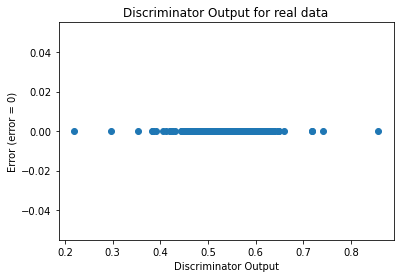

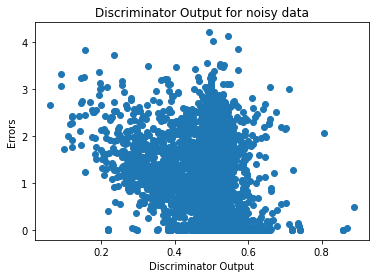

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [ ]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

In [ ]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

In [ ]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [ ]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [ ]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

In [ ]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())